In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns
import datetime

In [2]:
rawData = pd.read_csv('./temp_datalab_records_social_facebook.csv', encoding= 'utf-8')
rawData.head()

/Users/weihaoran/.virtualenvs/nlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621391 entries, 0 to 3621390
Data columns (total 14 columns):
dataset_id             int64
time                   object
username               object
checkins               int64
has_added_app          object
were_here_count        int64
likes                  int64
talking_about_count    int64
facebook_id            int64
date_added             object
date_updated           object
entity_id              float64
cusip                  float64
isin                   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 386.8+ MB


In [5]:
rawData['time'] = rawData['time'].apply(lambda x : x[:-3])
rawData.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [7]:
# process time
rawData['time'] = rawData['time'].apply(lambda x : datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [8]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621391 entries, 0 to 3621390
Data columns (total 14 columns):
dataset_id             int64
time                   datetime64[ns]
username               object
checkins               int64
has_added_app          object
were_here_count        int64
likes                  int64
talking_about_count    int64
facebook_id            int64
date_added             object
date_updated           object
entity_id              float64
cusip                  float64
isin                   float64
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 386.8+ MB


## Compare companies with highest volatility of “talking about count” — who they are – and use any information online to see if this metric overlaps with highly publicized events and marketing campaigns.

In [9]:
partOne = rawData[['time', 'username','talking_about_count','facebook_id','checkins','likes']]
partOne.head()

,time,username,talking_about_count,facebook_id,checkins,likes
0,2015-01-01 05:00:00,SodaStream,587,54885616308,0,761533
1,2015-01-01 05:00:00,ANSYSInc,1305,160242297413411,148,43442
2,2015-01-01 05:00:00,MyAquaAmerica,297,591693544195818,0,5591
3,2015-01-01 05:00:00,Qualcomm,2685,108472637291,173,1232521
4,2015-01-01 05:00:00,eaglepharmaceuticals,0,1428265940729350,0,18


In [10]:
partOneT = partOne.groupby('username')

In [27]:
talking = partOneT.agg({'talking_about_count':['min','max','std'] })
tacOnly = talking['talking_about_count']

In [28]:
tacOnly['Range'] = tacOnly['max'] - tacOnly['min']

/Users/weihaoran/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
tacOnly.sort_values(by='std', ascending=False)[:20]

,min,max,std,Range
username,,,,
CBSNews,0,4995264,852774.807781,4995264
manchesterunited,0,4300475,690647.941761,4300475
Storyful,0,3287107,674762.393334,3287107
yahoo,19006,4836366,650379.771238,4817360
usatoday,28029,3635912,538876.429033,3607883
NYPost,0,4864268,520474.008833,4864268
wwe,85229,5747010,509794.195966,5661781
nytimes,80152,4262960,485310.856850,4182808
CollegeHumor,52083,3597589,466257.217508,3545506


In [31]:
tacOnly.sort_values(by= ['std', 'Range'], ascending=False)[:20]

,min,max,std,Range
username,,,,
CBSNews,0,4995264,852774.807781,4995264
manchesterunited,0,4300475,690647.941761,4300475
Storyful,0,3287107,674762.393334,3287107
yahoo,19006,4836366,650379.771238,4817360
usatoday,28029,3635912,538876.429033,3607883
NYPost,0,4864268,520474.008833,4864268
wwe,85229,5747010,509794.195966,5661781
nytimes,80152,4262960,485310.856850,4182808
CollegeHumor,52083,3597589,466257.217508,3545506


In [124]:
cbs = partOneT.get_group('CBSNews')

In [125]:
cbs.head()

,time,talking_about_count,facebook_id,checkins,likes
941011,2016-08-20 04:00:00,342679,131459315949,430,3320733
944284,2016-08-21 04:00:00,574285,131459315949,430,3323003
945362,2016-08-22 04:00:00,605538,131459315949,430,3324369
948553,2016-08-23 04:00:00,615416,131459315949,430,3326084
951515,2016-08-24 04:00:00,849424,131459315949,430,3329024


In [126]:
baseTime = cbs['time'].iloc[0]
print(baseTime)

2016-08-20 04:00:00


In [153]:
cbs.iloc[40]

index                              1062409
time                   2016-09-29 04:00:00
talking_about_count                 464367
facebook_id                   131459315949
checkins                               428
likes                              3412339
Name: 40, dtype: object

In [127]:
cbs = cbs.reset_index()
times_cbs = cbs['time'] 
tacs_cbs = cbs['talking_about_count']

In [129]:
from scipy.signal import find_peaks

In [135]:
meanCbs = cbs['talking_about_count'].mean()
stdCbs = cbs['talking_about_count'].std()
find_peaks(cbs['talking_about_count'].values, height=meanCbs + stdCbs)

(array([ 46,  63,  99, 157, 160, 186, 304, 319, 633, 643, 649]),
 {'peak_heights': array([4595924., 2903442., 2059916., 3356144., 3417132., 4358821.,
         4404466., 4995264., 1931945., 3656951., 2320671.])})

In [142]:
tacs_cbs.shape

(652,)

In [147]:
import seaborn as sns 
sns.set_context('notebook') 
sns.set_style('white') 

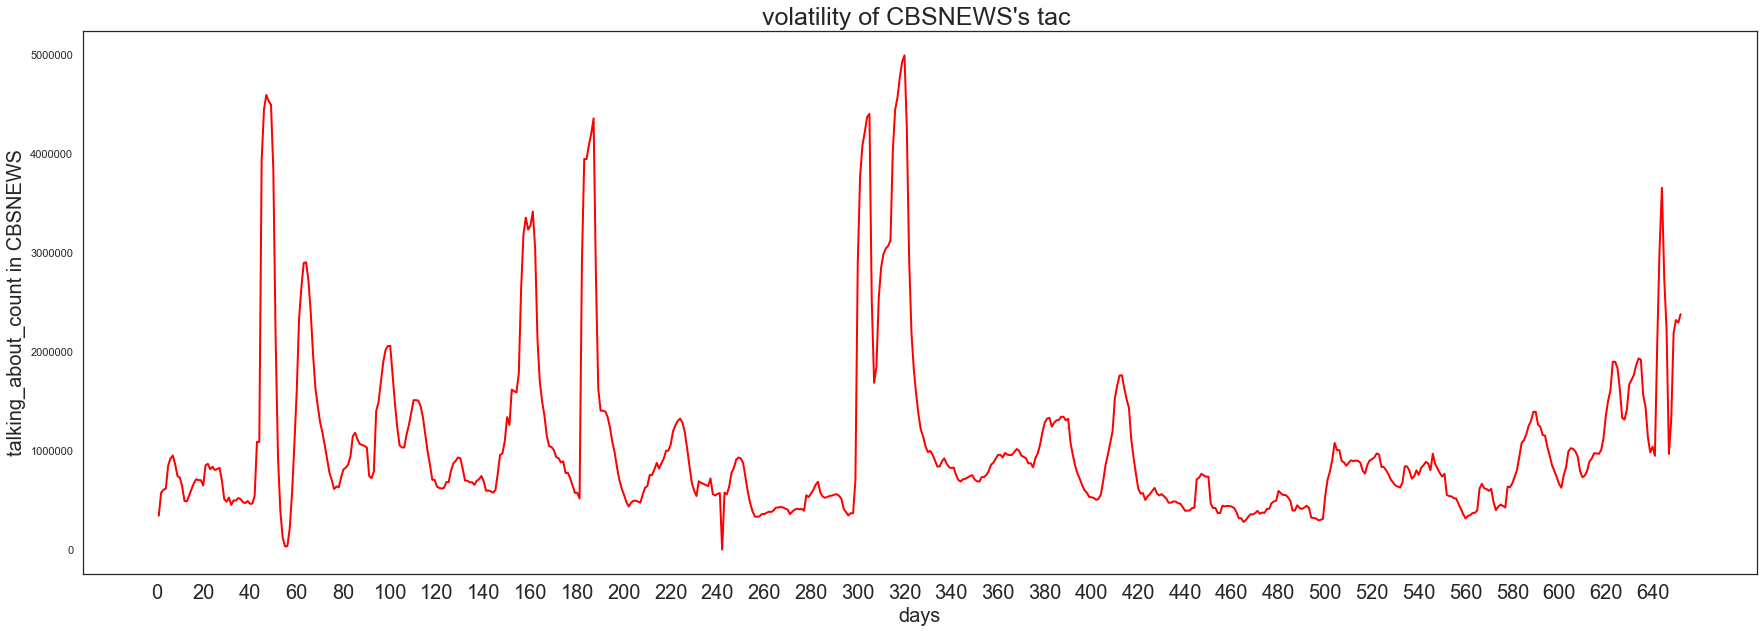

In [151]:
plt.figure(figsize=(30,10))
t = np.arange(1, len(tacs_cbs) + 1, 1)
plt.title('volatility of CBSNEWS\'s tac ', fontsize=25)
plt.xlabel('days',fontsize=20)
plt.ylabel('talking_about_count in CBSNEWS',fontsize=20)
plt.xticks(np.arange(0,tacs_cbs.shape[0], 20),fontsize=20)
plt.plot(t, tacs_cbs,label="cbs",color="red",linewidth=2)

## Facebook check-ins as a metric for foot traffic for restaurant, hospitality and retail businesses. Who are the winners in attracting customers to physical locations.

1. Based on max check-ins


In [63]:
checkinMax = partOneT.agg({'checkins':['max'] })['checkins']
resultsF = checkinMax.sort_values(by='max', ascending=False)

In [71]:
resultsF[:50]

,max
username,
Disneyland,17290550
WaltDisneyWorld,6547775
DisneylandParisfr,4487255
disneylandparis,4063748
TheGarden,3651157
MadisonSquareGarden,3282939
empirestatebuilding,2960168
KnottsBerryFarm,2947001
SeaWorld,2916920


In [68]:
resultsF[50:100]

,max
username,
atlmotorspeedway,298133
SkiHeavenly,295763
GrandCanyonU,282700
MISpeedway,278171
shakeshack,267932
ipcasino,266868
KnottsSoakCity,266860
nhmotorspeedway,244833
ExtendedStayAmerica,242847


**hospitality**: wynnlasvegas **restaurants:** shakeshack  **retails:**wholefoods

2. Based on ave check-ins

In [69]:
checkinAve = partOneT.agg({'checkins':['mean'] })['checkins']
resultsS = checkinAve.sort_values(by='mean', ascending=False)

In [73]:
resultsS[:50]

,mean
username,
Disneyland,1.590118e+07
WaltDisneyWorld,6.115426e+06
DisneylandParisfr,4.307778e+06
disneylandparis,4.021268e+06
TheGarden,3.484200e+06
MadisonSquareGarden,2.964063e+06
empirestatebuilding,2.583124e+06
KnottsBerryFarm,2.281984e+06
SeaWorld,2.230438e+06


In [74]:
resultsS[50:100]

,mean
username,
shakeshack,252161.842278
KnottsSoakCity,241706.485411
ExtendedStayAmerica,241598.307355
Northstar,229290.111597
nhmotorspeedway,222764.514019
MISpeedway,219822.811486
KFC,208685.499452
SkiHeavenly,204785.957330
ipcasino,199564.411765


 **hospitality**: wynnlasvegas **restaurants:** shakeshack  **retails:**crackerbarrel

3. Based on check-ins growth per day

In [82]:
groupDiffAve = []
users = []
for name, group in partOneT:
    users.append(name)
    temp = group['checkins'].diff().mean()
    groupDiffAve.append(temp)

In [89]:
groupDiffByUser = pd.DataFrame(index=users, data=groupDiffAve, columns=['AveGrowth'])

In [93]:
resultsT = groupDiffByUser.sort_values(ascending=False, by='AveGrowth')

In [94]:
resultsT[:50]

,AveGrowth
Disneyland,6258.736000
disneylandparis,2903.962963
MadisonSquareGarden,2397.220000
SeaWorld,2045.804948
BuschGardensTampa,1898.958763
WaltDisneyWorld,1832.040080
empirestatebuilding,1528.638889
BuschGardensTampaBay,1453.149533
KnottsBerryFarm,1303.974310
DisneylandParisfr,894.653191


In [96]:
resultsT[50:100]

,AveGrowth
MISpeedway,151.963750
ipcasino,147.979615
atlmotorspeedway,135.691011
AdventureIsland,134.156042
studiocitymacau,124.328947
samstownlv,124.035147
tdr.jp,120.128514
canterburypark,119.699234
wwe,119.405142
huntermtn,118.698777


In [97]:
resultsT[100:150]

,AveGrowth
nytimes,42.215301
sonicdrivein,41.398686
AttitashMountain,38.787462
MadRiverMountain,36.677914
generalmotors,35.986885
yahoo,35.612343
RetamaParkFanPage,34.301969
HollywoodGulfCoast,33.137344
fremontcasino,30.932050
Costco,30.801639


**hospitality**: wynnlasvegas **restaurants:** shakeshack  **retails:**Costco